In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(tf.__version__)

2.17.0


In [4]:
raw_dataset=pd.read_csv("DadasTOC_Tr.csv",sep=",")

In [5]:
DadasTOC_Tr = raw_dataset.copy()
DadasTOC_Tr.head()


,Well,Depth_km,TOC_%,GR,DT,LLD
0,ABDULAZIZ-1,2.755420,2.758250,96.983808,76.980847,1019.981338
1,ABDULAZIZ-1,2.756681,2.570798,94.995476,79.001914,1038.994700
2,ABDULAZIZ-1,2.765129,2.235287,91.000982,78.010830,1154.010822
3,ABDULAZIZ-1,2.773796,1.641798,89.014551,75.991738,1147.002568
4,ABDULAZIZ-1,2.801002,3.157476,115.000926,83.991328,1183.005556


In [10]:
DadasTOC_Tr.shape

(655, 6)

In [12]:
DadasTOC_Tr.describe()

,Depth_km,TOC_%,GR,DT,LLD
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,2.828389,4.259125,124.526554,91.060343,1278.961551
std,0.306014,2.809209,24.590288,15.406618,235.957079
min,2.358413,1.076288,69.000093,47.985198,835.994875
25%,2.439951,2.552481,105.011089,81.005860,1091.994747
50%,2.871006,3.444333,127.006076,89.005398,1256.990559
75%,3.041521,4.857083,145.002843,102.985239,1413.987141
max,3.385597,16.677352,171.012603,125.011731,2024.010700


In [14]:
DadasTOC_Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Well      655 non-null    object 
 1   Depth_km  655 non-null    float64
 2   TOC_%     655 non-null    float64
 3   GR        655 non-null    float64
 4   DT        655 non-null    float64
 5   LLD       655 non-null    float64
dtypes: float64(5), object(1)
memory usage: 30.8+ KB


<Figure size 10000x2500 with 0 Axes>

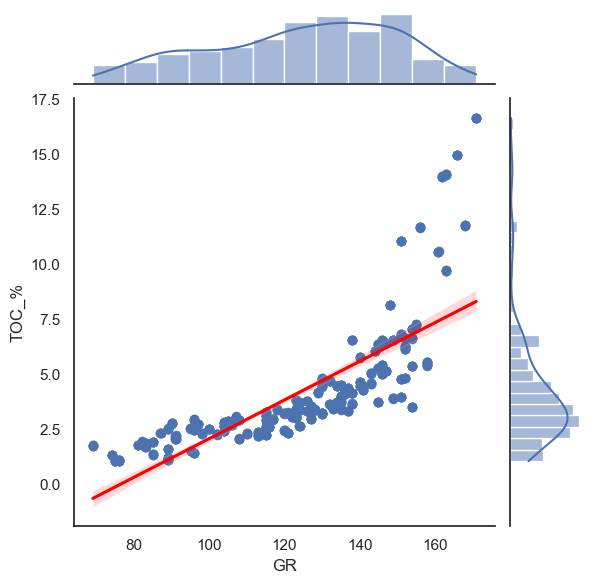

In [16]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasTOC_Tr['GR'], y = DadasTOC_Tr['TOC_%'], kind='reg', line_kws={"color": "red"})
font_size =80

<Figure size 10000x2500 with 0 Axes>

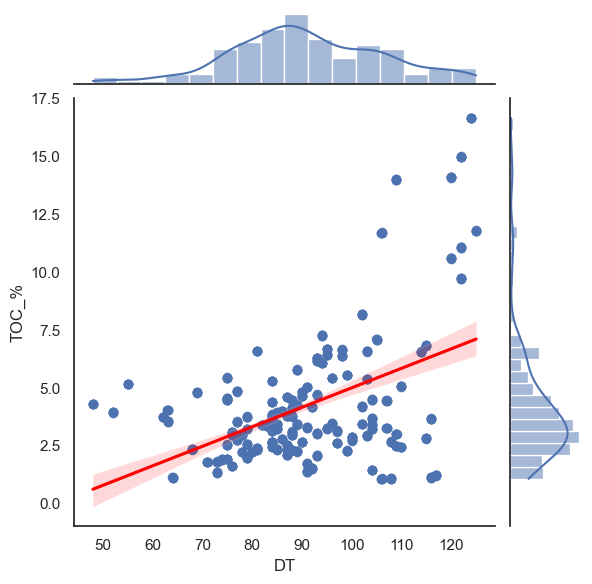

In [17]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasTOC_Tr['DT'], y = DadasTOC_Tr['TOC_%'], kind='reg', line_kws={"color": "red"})
font_size =80

<Figure size 10000x2500 with 0 Axes>

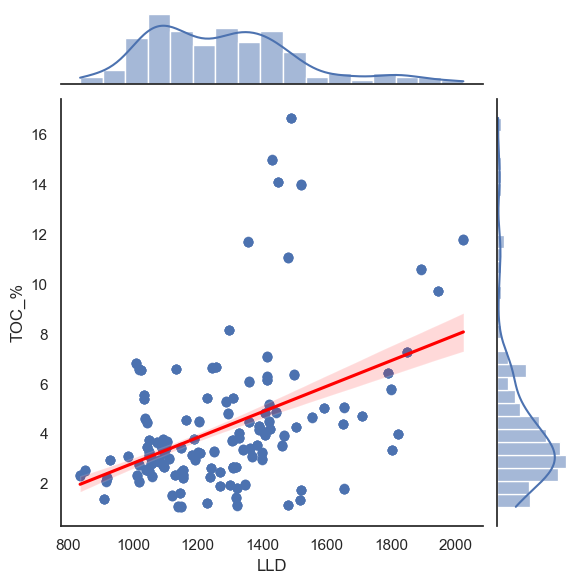

In [20]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasTOC_Tr['LLD'], y = DadasTOC_Tr['TOC_%'], kind='reg', line_kws={"color": "red"})
font_size =80

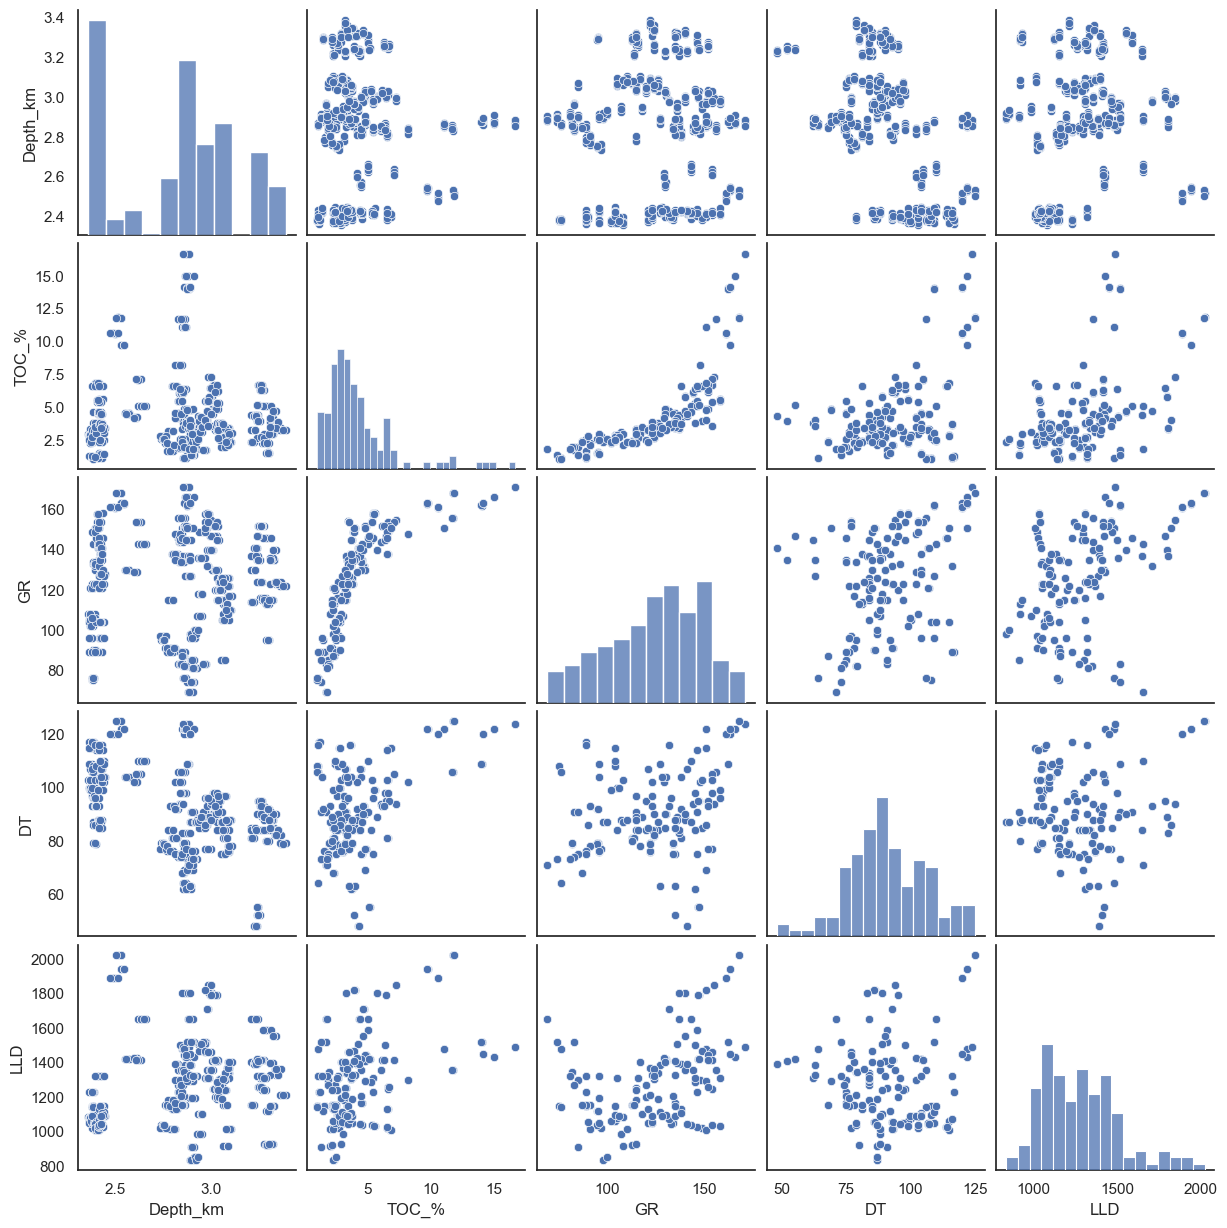

In [22]:
sns.pairplot(DadasTOC_Tr)


In [23]:
X = DadasTOC_Tr.iloc[:, 3:].values
y = DadasTOC_Tr.iloc[:,2].values


In [24]:
X

array([[  96.98380835,   76.98084676, 1019.98133823],
       [  94.99547624,   79.00191418, 1038.99470028],
       [  91.00098171,   78.01082955, 1154.01082173],
       ...,
       [ 130.01840537,  103.99678063, 1095.011899  ],
       [  95.98946795,  104.01196235, 1319.99022357],
       [ 128.01692112,  103.99709929, 1089.99329679]])

In [25]:
y

array([ 2.75825045,  2.57079825,  2.23528679,  1.64179817,  3.15747579,
        2.07142011,  6.60456438,  4.19085523,  8.18829123, 11.7145295 ,
        6.09854527,  6.3827018 , 11.08309617, 16.66771384, 13.99581548,
       15.00072337, 14.1040579 ,  1.73631395,  4.70531286,  5.79296104,
        7.29791484,  6.45141349,  4.82193295,  3.25056436,  3.32125945,
        2.4762536 ,  1.93767165,  2.67191627,  3.36449416,  3.10425385,
        2.99002552,  1.39749377,  2.33165402,  2.54476603,  3.09429345,
        3.41634011,  4.27796471,  3.93357009,  4.00630159,  3.52985512,
        5.42862122,  4.48874443,  6.67040317,  6.17856862,  5.29503118,
        3.80005319,  3.73185939,  2.63962813,  2.39430744,  2.10852401,
        2.32840443,  4.54577797,  5.4598692 ,  4.50582829,  1.92729368,
        2.55120222,  2.36513734,  1.98271546,  1.15046423,  3.35730861,
        4.86834444,  4.8030899 ,  3.7680481 ,  4.04811076,  3.55105321,
        1.36442135,  1.78766148,  2.96456986,  1.81281901, 10.59

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create an instance of StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train

array([[-0.06058606, -0.96517015,  0.39508756],
       [ 0.85957371, -0.44488674,  0.05417821],
       [-0.01990694,  0.14217058, -0.93085227],
       ...,
       [-1.65971715, -0.76922172,  0.29822085],
       [ 0.4599793 , -1.03031887, -0.47200942],
       [ 1.37943065,  0.53564771, -1.01924843]])

In [36]:
X_test

array([[ 1.01965255, -0.37906814,  0.80751074],
       [-0.01992877,  0.73152679, -0.78346963],
       [ 1.09918753,  1.57781927, -1.12027156],
       [ 1.13868731,  0.14379476,  0.58033649],
       [ 0.97923909,  0.72952676,  0.08782794],
       [ 0.65956104, -0.18170898,  0.34459747],
       [ 1.22026553, -0.89954408,  0.77812056],
       [ 1.13929989, -0.89990215,  0.70655214],
       [ 1.89917716,  2.16510633,  0.90028117],
       [-0.22006389, -0.11711592, -0.73307966],
       [ 0.53971851, -0.50812596,  2.2219456 ],
       [ 0.33960728,  0.14289459,  1.82623941],
       [ 0.49988837, -0.18296156,  0.50868448],
       [-0.85962654,  0.53444845, -0.90981314],
       [ 0.42027544, -1.0309751 , -0.29517502],
       [ 1.13995966,  0.14366255,  0.58029421],
       [ 0.93908187,  0.27427896,  2.16293677],
       [ 0.41914423, -0.77052578, -0.95607534],
       [ 0.01988452, -0.05219319,  0.18457811],
       [ 1.57977789,  2.03425662,  2.8112812 ],
       [-1.10064196,  1.18671157, -0.951

In [38]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [40]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(1024, activation='relu')(input_layer)
dense_layer_2 = Dense(512, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(256, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(128, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(128,activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_5)
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [42]:
my_model = model

In [44]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,249 (2.64 MB)

 Trainable params: 693,249 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, batch_size=2, epochs=1000, verbose=1, validation_split=0.2)

Epoch 1/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 7.6086 - mean_squared_error: 7.6086 - val_loss: 1.1266 - val_mean_squared_error: 1.1266
Epoch 2/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3712 - mean_squared_error: 1.3712 - val_loss: 2.8088 - val_mean_squared_error: 2.8088
Epoch 3/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4081 - mean_squared_error: 1.4081 - val_loss: 1.0903 - val_mean_squared_error: 1.0903
Epoch 4/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5985 - mean_squared_error: 1.5985 - val_loss: 0.6313 - val_mean_squared_error: 0.6313
Epoch 5/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6004 - mean_squared_error: 0.6004 - val_loss: 0.5610 - val_mean_squared_error: 0.5610
Epoch 6/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7250 - mean_squared_error: 0.7250 - val_loss: 0.7460 - val_mean_squared_error: 0.7460
Epoch 7/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0205 - mean_squared_error: 1.0205 - 

<Figure size 10000x2500 with 0 Axes>

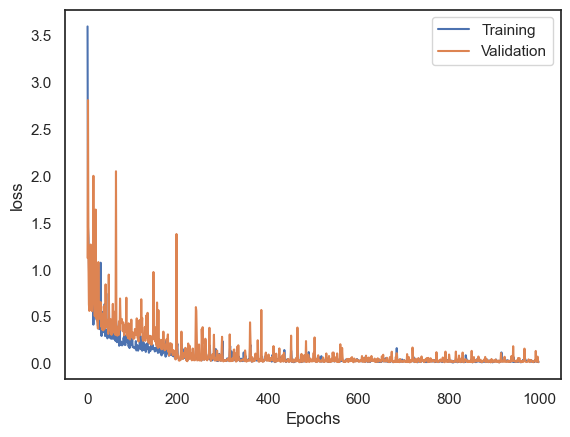

<Figure size 10000x2500 with 0 Axes>

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])
plt.figure(figsize = (20,5), dpi = (500))

In [48]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted labels:  [[ 4.]
 [ 4.]
 [ 7.]
 [ 6.]
 [ 8.]
 [ 5.]
 [ 4.]
 [ 5.]
 [17.]
 [ 3.]]
Actual labels :  [ 3.94846674  3.45333385  6.84694844  6.29443017  8.18600726  4.4751919
  3.52985512  4.87537562 16.6742589   3.42839704]


In [49]:
from sklearn.metrics import r2_score
y_true = np.round(predictions)
y_pred = y_test
r2_score(y_true, y_pred)

0.9859348935139215

<Figure size 15000x2500 with 0 Axes>

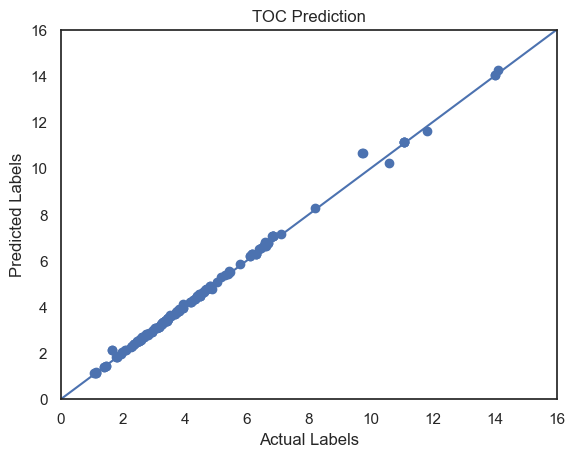

<Figure size 15000x2500 with 0 Axes>

In [50]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('TOC Prediction')
lims = [0, 16]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.figure(figsize = (30,5), dpi = (500))

In [51]:
my_model = model

In [52]:
my_tf_saved_model = tf.keras.models.load_model('./saved_models/my_tf_model.keras')

my_tf_saved_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,781 (2.00 MB)

 Trainable params: 174,593 (682.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 349,188 (1.33 MB)

In [53]:
my_tf_saved_model = tf.keras.models.load_model('./saved_models/my_tf_model.keras')
import pandas as pd


In [54]:
raw_dataset=pd.read_csv("Dadas_Pr.csv",sep=",")

In [55]:
Dadas_Pr = raw_dataset.copy()
Dadas_Pr.head()

,Well,Depth_km,GR,DT,LLD
0,Akcay_1,3.675,120,80,1410
1,Akcay_1,3.680,105,75,1270
2,Akcay_1,3.685,120,79,1210
3,Akcay_1,3.690,140,59,1560
4,Akcay_1,3.695,165,85,1900


In [56]:
X_new =Dadas_Pr.iloc[:, 2:].values

In [57]:
X_new

array([[ 120,   80, 1410],
       [ 105,   75, 1270],
       [ 120,   79, 1210],
       [ 140,   59, 1560],
       [ 165,   85, 1900],
       [ 160,   91, 1950],
       [ 165,   90, 1900],
       [ 130,   84, 1600],
       [ 120,   88, 1350],
       [ 126,   81, 1520],
       [ 140,   82, 1205],
       [ 125,   80, 1390],
       [ 124,   75, 1310],
       [  78,   70, 1453],
       [  76,   67, 1550],
       [  80,   80, 1510],
       [  81,   80, 1460],
       [  80,   81, 1610],
       [ 140,  110, 1400],
       [ 120,  105, 1200],
       [ 120,  104, 1505],
       [ 125,  105, 1510],
       [ 122,  103, 1120],
       [ 124,  106, 1100],
       [ 120,  103, 1600],
       [ 100,   90, 1550]], dtype=int64)

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler to your data
sc.fit(X_new)

# Transform your data
X_new = sc.transform(X_new)


In [59]:
X_new

array([[ 0.02163154, -0.50566425, -0.26048877],
       [-0.58096127, -0.88564316, -0.89985433],
       [ 0.02163154, -0.58166003, -1.17386814],
       [ 0.82508861, -2.10157569,  0.42454576],
       [ 1.82940995, -0.12568533,  1.97729069],
       [ 1.62854568,  0.33028936,  2.20563553],
       [ 1.82940995,  0.25429358,  1.97729069],
       [ 0.42336007, -0.20168112,  0.60722163],
       [ 0.02163154,  0.10230202, -0.53450258],
       [ 0.26266866, -0.42966847,  0.24186988],
       [ 0.82508861, -0.35367268, -1.19670263],
       [ 0.2224958 , -0.50566425, -0.35182671],
       [ 0.18232295, -0.88564316, -0.71717846],
       [-1.66562832, -1.26562208, -0.06411221],
       [-1.74597402, -1.49360943,  0.37887679],
       [-1.58528261, -0.50566425,  0.19620092],
       [-1.54510976, -0.50566425, -0.03214393],
       [-1.58528261, -0.42966847,  0.6528906 ],
       [ 0.82508861,  1.77420924, -0.30615774],
       [ 0.02163154,  1.39423033, -1.21953711],
       [ 0.02163154,  1.31823454,  0.173

In [60]:
print(model.predict(X_new))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[2.8836493]
 [2.4380035]
 [3.067557 ]
 [4.8006663]
 [5.3871703]
 [7.820827 ]
 [7.417655 ]
 [3.522188 ]
 [3.4499469]
 [3.396137 ]
 [4.7805376]
 [3.3690152]
 [3.097259 ]
 [1.8146236]
 [1.1437368]
 [1.5699391]
 [1.4101493]
 [1.805131 ]
 [6.8185487]
 [3.6957266]
 [4.0902157]
 [5.5921364]
 [4.397846 ]
 [4.596559 ]
 [4.011832 ]
 [1.9069959]]
